In [ ]:
import numpy as np
import pandas as pd

In [ ]:
dataset=pd.read_csv("/content/Social_Network_Ads.csv")

In [ ]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    object 
 2   Age              400 non-null    float64
 3   EstimatedSalary  400 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB


In [ ]:
dataset['Gender']=dataset['Gender'].astype('category')
dataset['Gender']=dataset['Gender'].cat.codes

In [ ]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19.0,19000.0,0
1,15810944,1,35.0,20000.0,0
2,15668575,0,26.0,43000.0,0
3,15603246,0,27.0,57000.0,0
4,15804002,1,19.0,76000.0,0


In [ ]:
dataset['Purchased'].value_counts()

,count
Purchased,
0,257
1,143


In [ ]:
dataset=dataset.iloc[:,1:]

In [ ]:
dataset.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19.0,19000.0,0
1,1,35.0,20000.0,0
2,0,26.0,43000.0,0
3,0,27.0,57000.0,0
4,1,19.0,76000.0,0


In [ ]:
y=dataset.iloc[:,-1]

In [ ]:
y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [ ]:
x=dataset.iloc[:,:-1]

In [ ]:
x.head()

,Gender,Age,EstimatedSalary
0,1,19.0,19000.0
1,1,35.0,20000.0
2,0,26.0,43000.0
3,0,27.0,57000.0
4,1,19.0,76000.0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 3)
(80, 3)
(320,)
(80,)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

In [ ]:
model=Sequential()
model.add(Dense(128,activation='relu',input_dim=3))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,153 (67.00 KB)

 Trainable params: 17,153 (67.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5572 - loss: 3659.8889 - val_accuracy: 0.6500 - val_loss: 438.3390
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6171 - loss: 844.1611 - val_accuracy: 0.3500 - val_loss: 375.0015
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4665 - loss: 170.3677 - val_accuracy: 0.3500 - val_loss: 13.4506
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4677 - loss: 88.8392 - val_accuracy: 0.3500 - val_loss: 187.0916
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5074 - loss: 136.2904 - val_accuracy: 0.6500 - val_loss: 279.1005
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5197 - loss: 261.6477 - val_accuracy: 0.3125 - val_loss: 7.0299
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5827 - loss: 72.0352 - val_accuracy: 0.3500 - val_loss: 115.9746
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4593 - loss: 119.2584 - val_a

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.transform(x_test)

In [ ]:
model_1=Sequential()
model_1.add(Dense(128,activation='relu',input_dim=3))
model_1.add(Dense(128,activation='relu'))
model_1.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,153 (67.00 KB)

 Trainable params: 17,153 (67.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history_1=model_1.fit(x_train_scaled,y_train,epochs=10,validation_data=(x_test_scaled,y_test))

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5335 - loss: 0.6578 - val_accuracy: 0.8750 - val_loss: 0.5207
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8762 - loss: 0.5198 - val_accuracy: 0.8750 - val_loss: 0.3983
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8691 - loss: 0.4339 - val_accuracy: 0.8750 - val_loss: 0.3154
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8363 - loss: 0.4006 - val_accuracy: 0.8875 - val_loss: 0.2636
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8690 - loss: 0.3446 - val_accuracy: 0.9000 - val_loss: 0.2335
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8597 - loss: 0.3241 - val_accuracy: 0.9375 - val_loss: 0.2095
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8887 - loss: 0.3087 - val_accuracy: 0.9375 - val_loss: 0.2033
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8819 - loss: 0.2780 - val_accuracy: 0.9375 - val_loss

In [ ]:
#accuracy: 0.4406 - loss: 414.9077 - val_accuracy: 0.3500 - val_loss: 717.0443 #without scaling
#accuracy: 0.9205 - loss: 0.2375 - val_accuracy: 0.9375 - val_loss: 0.1912 #with scaling

In [ ]:
#Feature scaling is mandatory in neural networks

In [ ]:
import matplotlib.pyplot as plt

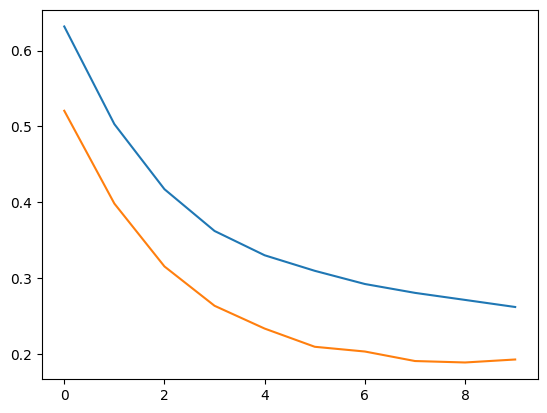

In [ ]:
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])


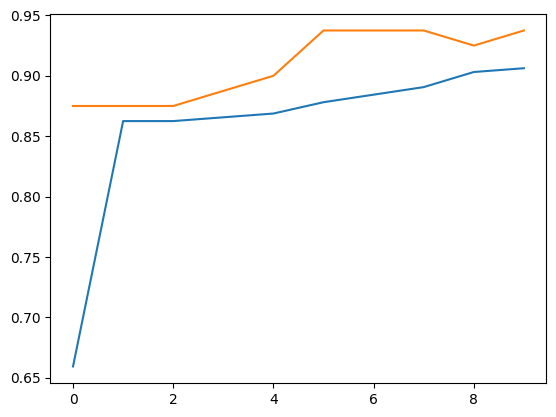

In [ ]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])

In [ ]:
model_1.get_weights()

[array([[ 0.2007868 ,  0.18575169,  0.11254016, -0.10027029, -0.10301735,
         -0.07658285, -0.17285454, -0.16760986, -0.09305833, -0.0557372 ,
         -0.09668875,  0.0965664 , -0.01097432, -0.06462152, -0.0094392 ,
          0.00042238,  0.21016054,  0.10335381, -0.0835256 , -0.1337394 ,
          0.19481845,  0.20011605,  0.19286785, -0.20386472, -0.17002986,
         -0.16375682,  0.12676385,  0.17186579,  0.13080736, -0.00051567,
         -0.22615562,  0.18408713,  0.08989761, -0.03935013,  0.1345753 ,
         -0.21141909,  0.1431974 , -0.18574439, -0.08273418,  0.06352082,
         -0.22971652, -0.07957524, -0.14404812,  0.02985872, -0.22863115,
          0.177079  , -0.13958904, -0.00552286, -0.20379941, -0.06870953,
          0.22734743,  0.00845414,  0.05361278,  0.21520726, -0.02388296,
         -0.17602444, -0.22562611, -0.23333366, -0.23652384,  0.24963413,
         -0.02642445,  0.03485573, -0.22497627, -0.22847138, -0.0945941 ,
          0.17739706, -0.13712981, -0.

In [ ]:
model_glorot=Sequential()
model_glorot.add(Dense(128,activation='relu',input_dim=3,kernel_initializer='glorot_normal'))
model_glorot.add(Dense(64,activation='relu',kernel_initializer='glorot_normal'))
model_glorot.add(Dense(32,activation='relu',kernel_initializer='glorot_normal'))
model_glorot.add(Dense(16,activation='relu',kernel_initializer='glorot_normal'))
model_glorot.add(Dense(1,activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_glorot.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 128)                 │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,393 (44.50 KB)

 Trainable params: 11,393 (44.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_glorot.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history_glorot=model_glorot.fit(x_train_scaled,y_train,epochs=10,validation_data=(x_test_scaled,y_test))

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.6364 - loss: 0.6727 - val_accuracy: 0.6500 - val_loss: 0.5641
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6500 - loss: 0.5648 - val_accuracy: 0.8000 - val_loss: 0.4507
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7646 - loss: 0.4722 - val_accuracy: 0.8750 - val_loss: 0.3665
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8392 - loss: 0.4089 - val_accuracy: 0.8750 - val_loss: 0.3016
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8669 - loss: 0.3578 - val_accuracy: 0.9000 - val_loss: 0.2522
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8896 - loss: 0.2938 - val_accuracy: 0.9250 - val_loss: 0.2138
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8923 - loss: 0.2729 - val_accuracy: 0.9125 - val_loss: 0.1966
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9210 - loss: 0.2274 - val_accuracy: 0.9125 - val_loss

In [ ]:
model_he=Sequential()
model_he.add(Dense(128,activation='relu',input_dim=3,kernel_initializer='he_normal'))
model_he.add(Dense(64,activation='relu',kernel_initializer='he_normal'))
model_he.add(Dense(32,activation='relu',kernel_initializer='he_normal'))
model_he.add(Dense(16,activation='relu',kernel_initializer='he_normal'))
model_he.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_he.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history_he=model_he.fit(x_train_scaled,y_train,epochs=10,validation_data=(x_test_scaled,y_test))

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.5575 - loss: 0.6877 - val_accuracy: 0.7250 - val_loss: 0.4697
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7799 - loss: 0.4717 - val_accuracy: 0.8875 - val_loss: 0.3164
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8421 - loss: 0.3724 - val_accuracy: 0.9375 - val_loss: 0.2435
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8771 - loss: 0.3173 - val_accuracy: 0.9250 - val_loss: 0.2184
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8954 - loss: 0.2680 - val_accuracy: 0.9250 - val_loss: 0.2127
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9066 - loss: 0.2505 - val_accuracy: 0.9125 - val_loss: 0.2147
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8898 - loss: 0.2823 - val_accuracy: 0.9125 - val_loss: 0.2147
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9043 - loss: 0.2413 - val_accuracy: 0.9125 - val_loss

In [ ]:
model_he_regulariztion=Sequential()
model_he_regulariztion.add(Dense(128,activation='relu',input_dim=3,kernel_initializer='he_normal',kernel_regularizer=keras.regularizers.l1(0.001)))
model_he_regulariztion.add(Dense(64,activation='relu',kernel_initializer='he_normal',kernel_regularizer=keras.regularizers.l1(0.001)))
model_he_regulariztion.add(Dense(32,activation='relu',kernel_initializer='he_normal',kernel_regularizer=keras.regularizers.l1(0.001)))
model_he_regulariztion.add(Dense(16,activation='relu',kernel_initializer='he_normal',kernel_regularizer=keras.regularizers.l1(0.001)))
model_he_regulariztion.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_he_regulariztion.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history_he_regularization=model_he_regulariztion.fit(x_train_scaled,y_train,epochs=10,validation_data=(x_test_scaled,y_test))

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.7326 - loss: 2.1098 - val_accuracy: 0.9125 - val_loss: 1.7680
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8369 - loss: 1.8427 - val_accuracy: 0.9250 - val_loss: 1.7199
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8820 - loss: 1.7548 - val_accuracy: 0.9125 - val_loss: 1.6480
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9172 - loss: 1.7101 - val_accuracy: 0.9250 - val_loss: 1.6245
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9182 - loss: 1.6408 - val_accuracy: 0.9375 - val_loss: 1.5928
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9147 - loss: 1.6172 - val_accuracy: 0.9250 - val_loss: 1.5744
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9076 - loss: 1.5923 - val_accuracy: 0.9250 - val_loss: 1.5524
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9070 - loss: 1.5694 - val_accuracy: 0.9250 - val_loss

In [ ]:
#model.set_weights(list)

10

In [ ]:
#https://www.industrygradai.com/